 # PyPRT - Creation of 3D GIS Content (Parks)


In [1]:
import sys
import os

from arcgis.gis import GIS
from arcgis.geocoding import geocode
from IPython.display import IFrame

import pyprt
from pyprt.pyprt_arcgis import arcgis_to_pyprt

gis = GIS(username='CLechot_zurich')

Enter password: ········


In [2]:
pyprt.initialize_prt()

if(not pyprt.is_prt_initialized()):
    raise Exception("PRT is not initialized")

[PRT] [2020-02-20 11:54:09] [error] failed to load library: error while loading library 'c:\users\cami9495\documents\esri-cityengine-sdk-master\examples\py4prt\pyprt\pyprt\lib\com.esri.prt.unreal.dll': The specified module could not be found.

[PRT] [2020-02-20 11:54:09] [error] failed to load library: error while loading library 'c:\users\cami9495\documents\esri-cityengine-sdk-master\examples\py4prt\pyprt\pyprt\lib\DatasmithSDK.dll': The specified module could not be found.



### Story: Zürich Bahnhofstrasse

In [3]:
existing_id = '65696aefd99445bf86bf682a7f2530c6'
existing = gis.content.get(existing_id)

In [4]:
map0 = gis.map(mode='3D')
location = geocode("Zurich")[0]
map0.extent = location['extent']
map0

MapView(layout=Layout(height='400px', width='100%'), mode='3D')

In [5]:
map0.add_layer(existing)

### Get parks parcels from ArcGIS Online

<Item title:"ZurichParksParcels" type:Feature Layer Collection owner:CLechot_zurich>
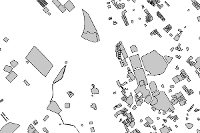

In [6]:
item = gis.content.get('513577e3f69646e49e3f7f8f99f6040f')
item

In [7]:
map1 = gis.map()
map1.extent = item.extent
map1.add_layer(item, {'opacity': 0.5})
map1

MapView(layout=Layout(height='400px', width='100%'))

#### Region delimiting/ IDs of the parks parcels to redevelop : Zürich old town

In [8]:
id_list = (192, 510, 797, 1026, 1031, 1247, 1533,
           1570, 1594, 2005, 2215, 2469, 2477, 2728)

In [9]:
filtered_parks_set = item.layers[0].query(
    where='shape__id IN ' + str(id_list), return_z=True)
filtered_parks_set

<FeatureSet> 14 features

In [10]:
map2 = gis.map()
map2.extent = item.extent
map2

MapView(layout=Layout(height='400px', width='100%'))

In [11]:
map2.add_layer(filtered_parks_set)
map2.zoom_to_layer(item=filtered_parks_set)

### Get the parcels geometry

In [12]:
initial_geometries_from_set = arcgis_to_pyprt(filtered_parks_set)

### PRT generation

<Item title:"Greenspace Construction_smallversion" type:Rule Package owner:CLechot_zurich>
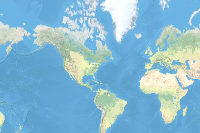

In [14]:
rpk = gis.content.get('2c31f077021b495cbfe4097227fdd78e')
attrs = {'ruleFile': 'rules/Landscape_Design_Greenspace/Greenspace ConstructionSMALL.cgb',
         'startRule': 'Default$GreenSpace', 'shapeName': 'Trees'}
rpk

In [20]:
export_file_name = 'ex8_pyprt_GeneratedParks'
enc_optionsSLPK = {'sceneType': 'Local', 'baseName': export_file_name, 'sceneWkid': '3857', 'layerTextureEncoding': ['2'], 'layerEnabled': [True], 'layerUID': ['1'], 'layerName': ['1'], 'layerTextureQuality': [
    1.0], 'layerTextureCompression': [9], 'layerTextureScaling': [1.0], 'layerTextureMaxDimension': [2048], 'layerFeatureGranularity': ['0'], 'layerBackfaceCulling': [False], 'outputPath': os.path.join(os.getcwd(), 'output')}
os.makedirs(enc_optionsSLPK['outputPath'], exist_ok=True)

In [21]:
mod_parcel = pyprt.ModelGenerator(initial_geometries_from_set)
generated_parks = mod_parcel.generate_model(
    [attrs], rpk.download(), 'com.esri.prt.codecs.I3SEncoder', enc_optionsSLPK)

### From Python to ArcGIS

In [22]:
dataset = os.path.join(enc_optionsSLPK['outputPath'], export_file_name+'.slpk')

In [24]:
item_to_upload = gis.content.add({'type': 'Scene Package'}, data=dataset)

In [25]:
published_item = item_to_upload.publish()

In [26]:
display(published_item)

<Item title:"ex8_pyprt_GeneratedParks" type:Scene Layer owner:CLechot_zurich>

### Visualization

In [27]:
map3 = gis.map(mode='3D')
map3.basemap = 'gray' 
map3.add_layer(published_item)
map3.add_layer(existing)
map3.extent = published_item.extent
map3

MapView(layout=Layout(height='400px', width='100%'), mode='3D')

In [28]:
pyprt.shutdown_prt()